### Librairies

In [1]:
import matplotlib.pyplot as plt
import numpy as np


In [2]:
import sympy as sp
from sympy.physics.mechanics import dynamicsymbols

In [3]:
from sympy.physics.vector import init_vprinting
init_vprinting(use_latex='mathjax', pretty_print=False)

In [4]:
from sympy import diff

In [5]:
from sympy import Matrix

from numpy import sqrt,sin,cos,pi

### MGD

In [6]:
def MGD(theta1,theta2,theta3):

    #Paramètres géométriques
    
    h=78.0762
    b=71.1654
    a=31.8449
    c=235.0000
    
    angle = 2*np.pi/3

    # Paramétres du problème : variables dinitilisation

    X=[]

    #xm_0=0        
    #ym_0=0        
    #phi_0=0 
    #alpha1_0=0 
    #alpha2_0=0
    #alpha3_0=0

    X=np.array([[1.15],[1.05],[1],[1.9],[1.3],[-1.7]]) #Vecteur X0



    #Position prédéfini des jambes 

    xq=c
    yq = 0

    xr=c/2
    yr=c*np.sqrt(3)/2

    xp = 0
    yp = 0

    xd = a * np.cos(theta1)
    yd = a * np.sin(theta1)

    xe = xq + a * np.cos(theta2)
    ye = a * np.sin(theta2)

    xf = xr +a * np.cos(theta3) 
    yf = yr +a * np.sin(theta3)


    #### Résolution ####

    F=[]
    n=0


    ## Boucle itérative pour tendre vers F=0 :
    eps=10000

    while eps>0.000001:

        if n>500:
            break

        #print('n = ',n)
        #print('X = ',X[:,n])

        #Calcul de F[n]

        xb1 = (h * np.sqrt(3) / 3) * np.cos(-np.pi / 6 + X[2,n])
        yb1 = (h * np.sqrt(3) / 3) * np.sin(-np.pi / 6 + X[2,n])

        xc1 = xb1 * np.cos(angle) - yb1 * np.sin(angle)
        yc1 = xb1 * np.sin(angle) + yb1 * np.cos(angle)

        xa1 = xc1 * np.cos(angle) - yc1 * np.sin(angle)
        ya1 = xc1 * np.sin(angle) + yc1 * np.cos(angle)

        xb1 += X[0,n]
        xc1 += X[0,n]
        xa1 += X[0,n]

        yb1 += X[1,n]
        yc1 += X[1,n]
        ya1 += X[1,n]

        xc2=xf+b*np.cos(theta3+X[5,n])
        yc2=yf+b*np.sin(theta3+X[5,n])

        xb2=xe+b*np.cos(theta2+X[4,n])
        yb2=ye+b*np.sin(theta2+X[4,n])

        xa2=xd+b*np.cos(theta1+X[3,n])
        ya2=yd+b*np.sin(theta1+X[3,n])

        Fnew=np.array([[xa1-xa2],[ya1-ya2],[xb1-xb2],[yb1-yb2],[xc1-xc2],[yc1-yc2]])
        eps=np.amax(abs(Fnew))

        if n!=0:
            F=np.concatenate([F,Fnew],axis= 1)
        else:
            F=Fnew

        #print('F = ',F)
        #print('eps = ',eps)

        #Calcul de J

        J=[[1, 0,-sqrt(3)*(-sqrt(3)*h*sin(X[2,n] + pi/3)/6 + h*cos(X[2,n] + pi/3)/2)/2 + h*sin(X[2,n] + pi/3)/4 + sqrt(3)*h*cos(X[2,n] + pi/3)/12,b*sin(X[3,n] + theta1), 0, 0],[0, 1,sqrt(3)*(-h*sin(X[2,n] + pi/3)/2 - sqrt(3)*h*cos(X[2,n] + pi/3)/6)/2 + sqrt(3)*h*sin(X[2,n] + pi/3)/12 - h*cos(X[2,n] + pi/3)/4,-b*cos(X[3,n] + theta1), 0, 0],[1, 0, sqrt(3)*h*cos(X[2,n] + pi/3)/3, 0,b*sin(X[4,n] + theta2), 0],[0, 1, sqrt(3)*h*sin(X[2,n] + pi/3)/3, 0,-b*cos(X[4,n] + theta2), 0],[1, 0,-h*sin(X[2,n] + pi/3)/2 - sqrt(3)*h*cos(X[2,n] + pi/3)/6,0, 0, b*sin(X[5,n] + theta3)],[0, 1,-sqrt(3)*h*sin(X[2,n] + pi/3)/6 + h*cos(X[2,n] + pi/3)/2,0, 0, -b*cos(X[5,n] + theta3)]]

        #print('J = ',J)
        #Nouveau X

        invJ=np.linalg.inv(J)
        #print('invJ = ',invJ)

        Xnew=X[:,n].reshape((6, 1))- (invJ @ F[:,n].reshape((6, 1)))
        Xnew[2:6] = Xnew[2:6]%(2*np.pi)
        #print(Xnew[2:6])

        X=np.concatenate([X,Xnew],axis= 1)

        #eps=np.linalg.norm(Xnew-X[:,n])

        #print('')
        n=n+1

    return X[:,n]

# Variables d'entrée

theta1=45*np.pi/180
theta2=(45+90)*np.pi/180
theta3=(180+90)*np.pi/180


X=MGD(theta1,theta2,theta3)
X

array([120.67900959,  67.94068683,   5.71677666,   6.22579125,
         0.70865601,   0.39473655])

### Affichage MGD

[1.17500000e+02 6.78386566e+01 4.29318072e-02 1.07881935e+00
 1.07881935e+00 1.07881935e+00]


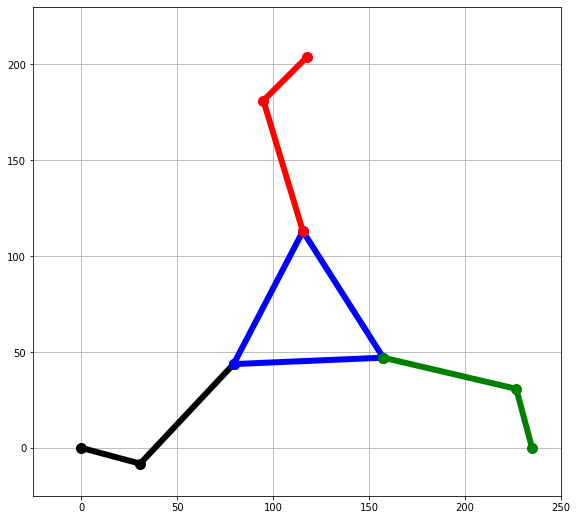

In [7]:
# Variables d'entrée

Delta=-0.7345612758087483
Angle=-15
theta1=(Angle)*np.pi/180
#theta1=(Angle+Delta)*np.pi/180
theta2=(Angle+120)*np.pi/180
theta3=(Angle+240)*np.pi/180


X=MGD(theta1,theta2,theta3)
print(X)


xm, ym, phi, alpha1, alpha2, alpha3 = X[0], X[1], X[2], X[3], X[4], X[5]
fig, ax = plt.subplots(figsize=(16, 9))
ax.set_xlim([-25, 250])
ax.set_ylim([-25, 230])
ax.grid(True)
ax.set_aspect('equal', 'box')

#ax.lines = []
line, = ax.plot([], [], marker='o', c='k', lw=6, ms=10)
line2, = ax.plot([], [], marker='o', c='b', lw=6, ms=10)
line3, = ax.plot([], [], marker='o', c='g', lw=6, ms=10)
line4, = ax.plot([], [], marker='o', c='r', lw=6, ms=10)


#Paramètres géométriques

#h=2
#b=1
#a=1
#c=4
h=78.0762
b=71.1654
a=31.8449
c=235.0000
angle = 2*np.pi/3


#Position prédéfini des jambes 

xq=c
yq = 0

xr=c/2
yr=c*np.sqrt(3)/2

xp = 0
yp = 0


xd = a * np.cos(theta1)
yd = a * np.sin(theta1)

xe = xq + a * np.cos(theta2)
ye = a * np.sin(theta2)

xf = xr + a * np.cos(theta3)
yf = yr + a * np.sin(theta3)

#Equations de résolution

xb1 = 0 + (h * np.sqrt(3) / 3) * np.cos(-np.pi / 6 + phi)
yb1 = 0 + (h * np.sqrt(3) / 3) * np.sin(-np.pi / 6 + phi)

angle = 2*np.pi/3

xc1 = xb1 * np.cos(angle) - yb1 * np.sin(angle)
yc1 = xb1 * np.sin(angle) + yb1 * np.cos(angle)

xa1 = xc1 * np.cos(angle) - yc1 * np.sin(angle)
ya1 = xc1 * np.sin(angle) + yc1 * np.cos(angle)

xb1 += xm
xc1 += xm
xa1 += xm

yb1 += ym
yc1 += ym
ya1 += ym

xc2 = xf + b * np.cos(theta3 + alpha3)
yc2 = yf + b * np.sin(theta3 + alpha3)

xb2 = xe + b * np.cos(theta2 + alpha2)
yb2 = ye + b * np.sin(theta2 + alpha2)

xa2 = xd + b * np.cos(theta1 + alpha1)
ya2 = yd + b * np.sin(theta1 + alpha1)


#Affichage


thisx = [xp, xd, xa2]
thisy = [yp, yd, ya2]
line.set_data(thisx, thisy)

thisx1 = [xa1, xc1, xb1, xa1]
thisy1 = [ya1, yc1, yb1, ya1]
line2.set_data(thisx1, thisy1)

thisx2 = [xq, xe, xb2]
thisy2 = [yq, ye, yb2]
line3.set_data(thisx2, thisy2)

thisx3 = [xr, xf, xc2]
thisy3 = [yr, yf, yc2]
line4.set_data(thisx3, thisy3)
plt.show()

### Modèle élastique

##### Test d'une configuration

In [8]:
#Rigidité d'une liaision pivot

E=210*10**3
b=3
e=0.05
r=3

Kpivot=(2*E*b*e**(2.5))/(9*np.pi*np.sqrt(r))
print(Kpivot)
#Config du piezo

Course=0.09
Levier=7.02
DeltaX=-Course/Levier

print("Amplitude du mouvement angulaire d'une jambe :", abs(DeltaX*180/np.pi), '° soit ', abs(DeltaX), 'rad')

#Configs initiales du MGD

AngleInit=-11
theta10=AngleInit*np.pi/180
theta20=(AngleInit+120)*np.pi/180
theta30=(AngleInit+240)*np.pi/180

Config0=MGD(theta10,theta20,theta30)

########################################################
### Pour 1 actionnement
########################################################

theta11=theta10+DeltaX
theta21=theta20
theta31=theta30

Config1=MGD(theta11,theta21,theta31)

#DeltaAlpha=(Config1[3:6]-Config0[3:6])%(2*np.pi)
#DeltaAlpha=np.array([max(Config1[3],Config0[3])-min(Config1[3],Config0[3]),max(Config1[4],Config0[4])-min(Config1[3],Config0[4]),max(Config1[5],Config0[5])-min(Config1[5],Config0[5])])%(2*np.pi)
#DeltaTheta=np.array([max(theta11,theta10)-min(theta11,theta10),max(theta21,theta20)-min(theta21,theta20),max(theta31,theta30)-min(theta31,theta30)])%(2*np.pi)
#DeltaPhi=np.array([max(Config1[2],Config0[2])-min(Config1[2],Config0[2]),max(Config1[2],Config0[2])-min(Config1[2],Config0[2]),max(Config1[2],Config0[2])-min(Config1[2],Config0[2])])%(2*np.pi)
#DeltaBetaPiezo=np.array([-theta1,-theta2,-theta3])%(2*np.pi) #beta représente l'angle de la pivot au niveau du piezo

#DeltaAlpha=(Config1[3:6]-Config0[3:6])%(2*np.pi)
#DeltaTheta=np.array([theta11-theta10,theta21-theta20,theta31-theta30])%(2*np.pi)
#DeltaPhi=np.array([Config1[2]-Config0[2],Config1[2]-Config0[2],Config1[2]-Config0[2]])%(2*np.pi)
#DeltaBetaPiezo=np.array([-theta1,-theta2,-theta3])%(2*np.pi) #beta représente l'angle de la pivot au niveau du piezo

DeltaAlpha=np.array([min((Config1[3]-Config0[3])%(2*np.pi),(Config0[3]-Config1[3])%(2*np.pi)),min((Config1[4]-Config0[4])%(2*np.pi),(Config0[4]-Config1[4])%(2*np.pi)),min((Config1[5]-Config0[5])%(2*np.pi),(Config0[5]-Config1[5])%(2*np.pi))])
DeltaTheta=np.array([min((theta11-theta10)%(2*np.pi),(theta10-theta11)%(2*np.pi)),min((theta21-theta20)%(2*np.pi),(theta20-theta21)%(2*np.pi)),min((theta31-theta30)%(2*np.pi),(theta30-theta31)%(2*np.pi))])
DeltaPhi=np.array([min((Config1[2]-Config0[2])%(2*np.pi),(Config0[2]-Config1[2])%(2*np.pi)),min((Config1[2]-Config0[2])%(2*np.pi),(Config0[2]-Config1[2])%(2*np.pi)),min((Config1[2]-Config0[2])%(2*np.pi),(Config0[2]-Config1[2])%(2*np.pi))])
DeltaBetaPiezo=np.array([-theta1,-theta2,-theta3])%(2*np.pi) #beta représente l'angle de la pivot au niveau du piezo


DeltaAngle=abs(np.concatenate([DeltaAlpha,DeltaTheta,DeltaPhi,DeltaBetaPiezo],axis= 0))

print('Déplacement plateforme 1 piezo :', abs(DeltaPhi[1]*180/np.pi) , '°' )

#print('')
#print(Config0)
#print(Config1)
#print(DeltaPhi)
#print('')

#Rigidité équivalente

Keq=(1/DeltaX**2)*Kpivot

SumDeltaAngleCarre=0
for i in DeltaAngle:
    SumDeltaAngleCarre+=i**2
     
Keq=Keq*SumDeltaAngleCarre

print('Raideur équivalente 1 piezo :', Keq/1000, 'N/um' )

########################################################
### Pour 2 actionnements
########################################################

#Configs du MGD

theta11=theta10+DeltaX
theta21=theta20+DeltaX
theta31=theta30

Config1=MGD(theta11,theta21,theta31)

DeltaAlpha=np.array([min((Config1[3]-Config0[3])%(2*np.pi),(Config0[3]-Config1[3])%(2*np.pi)),min((Config1[4]-Config0[4])%(2*np.pi),(Config0[4]-Config1[4])%(2*np.pi)),min((Config1[5]-Config0[5])%(2*np.pi),(Config0[5]-Config1[5])%(2*np.pi))])
DeltaTheta=np.array([min((theta11-theta10)%(2*np.pi),(theta10-theta11)%(2*np.pi)),min((theta21-theta20)%(2*np.pi),(theta20-theta21)%(2*np.pi)),min((theta31-theta30)%(2*np.pi),(theta30-theta31)%(2*np.pi))])
DeltaPhi=np.array([min((Config1[2]-Config0[2])%(2*np.pi),(Config0[2]-Config1[2])%(2*np.pi)),min((Config1[2]-Config0[2])%(2*np.pi),(Config0[2]-Config1[2])%(2*np.pi)),min((Config1[2]-Config0[2])%(2*np.pi),(Config0[2]-Config1[2])%(2*np.pi))])
DeltaBetaPiezo=np.array([-theta1,-theta2,-theta3])%(2*np.pi) #beta représente l'angle de la pivot au niveau du piezo


DeltaAngle=abs(np.concatenate([DeltaAlpha,DeltaTheta,DeltaPhi,DeltaBetaPiezo],axis= 0))

print('Déplacement plateforme 2 piezos :', abs(DeltaPhi[1]*180/np.pi) , '°' )

#Rigidité équivalente

Keq=(1/DeltaX**2)*Kpivot

SumDeltaAngleCarre=0
for i in DeltaAngle:
    SumDeltaAngleCarre+=i**2
     
Keq=Keq*SumDeltaAngleCarre

print('Raideur équivalente 2 piezos :', Keq/1000, 'N/um' )

########################################################
### Pour 3 actionnements
########################################################

#Configs du MGD

theta11=theta10+DeltaX
theta21=theta20+DeltaX
theta31=theta30+DeltaX

Config1=MGD(theta11,theta21,theta31)

DeltaAlpha=np.array([min((Config1[3]-Config0[3])%(2*np.pi),(Config0[3]-Config1[3])%(2*np.pi)),min((Config1[4]-Config0[4])%(2*np.pi),(Config0[4]-Config1[4])%(2*np.pi)),min((Config1[5]-Config0[5])%(2*np.pi),(Config0[5]-Config1[5])%(2*np.pi))])
DeltaTheta=np.array([min((theta11-theta10)%(2*np.pi),(theta10-theta11)%(2*np.pi)),min((theta21-theta20)%(2*np.pi),(theta20-theta21)%(2*np.pi)),min((theta31-theta30)%(2*np.pi),(theta30-theta31)%(2*np.pi))])
DeltaPhi=np.array([min((Config1[2]-Config0[2])%(2*np.pi),(Config0[2]-Config1[2])%(2*np.pi)),min((Config1[2]-Config0[2])%(2*np.pi),(Config0[2]-Config1[2])%(2*np.pi)),min((Config1[2]-Config0[2])%(2*np.pi),(Config0[2]-Config1[2])%(2*np.pi))])
DeltaBetaPiezo=np.array([-theta1,-theta2,-theta3])%(2*np.pi) #beta représente l'angle de la pivot au niveau du piezo

DeltaAngle=abs(np.concatenate([DeltaAlpha,DeltaTheta,DeltaPhi,DeltaBetaPiezo],axis= 0))

print('Déplacement plateforme 3 piezos :', abs(DeltaPhi[1]*180/np.pi) , '°' )

#Rigidité équivalente

Keq=(1/DeltaX**2)*Kpivot

SumDeltaAngleCarre=0
for i in DeltaAngle:
    SumDeltaAngleCarre+=i**2
     
Keq=Keq*SumDeltaAngleCarre

print('Raideur équivalente 3 piezos :', Keq/1000, 'N/um' )


14.382770361434996
Amplitude du mouvement angulaire d'une jambe : 0.7345612758087476 ° soit  0.01282051282051282 rad
Déplacement plateforme 1 piezo : 30.607195892874017 °
Raideur équivalente 1 piezo : 2330.6066287130648 N/um
Déplacement plateforme 2 piezos : 0.5598576363302745 °
Raideur équivalente 2 piezos : 2225.2135085383657 N/um
Déplacement plateforme 3 piezos : 0.8492527938791691 °
Raideur équivalente 3 piezos : 2225.3388406530676 N/um


##### Recherche de minimum de raideur

Angle qui minimise la raideur : -7 °
K1= 2225.1044524578447 N/um et déplacement de  0.281510633456419 °
K2= 2225.143299541363 N/um et déplacement de  0.5651192964788679 °
K3= 2225.1828154957097 N/um et déplacement de  0.8509093559097729 °

Position de la plateforme pour raideur min :
[117.5         67.83865663   6.10882884   1.03468183   1.03468183
   1.03468183]


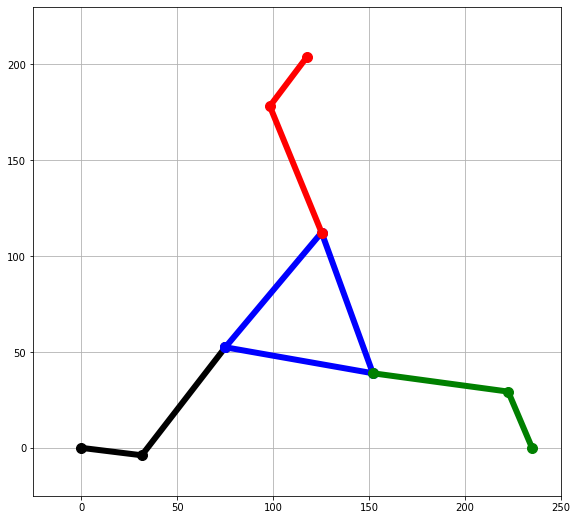

In [9]:
Angles=[]
K1=[]
K2=[]
K3=[]
Ksum=[]
Phi1=[]
Phi2=[]
Phi3=[]


for i in range(0,61):

    #Configs initiales du MGD
    AngleInit=-20+i
    Angles.append(AngleInit)
    theta10=AngleInit*np.pi/180
    theta20=(AngleInit+120)*np.pi/180
    theta30=(AngleInit+240)*np.pi/180

    Config0=MGD(theta10,theta20,theta30)

    ########################################################
    ### Pour 1 actionnement
    ########################################################

    theta11=theta10+DeltaX
    theta21=theta20
    theta31=theta30

    Config1=MGD(theta11,theta21,theta31)

    DeltaAlpha=np.array([min((Config1[3]-Config0[3])%(2*np.pi),(Config0[3]-Config1[3])%(2*np.pi)),min((Config1[4]-Config0[4])%(2*np.pi),(Config0[4]-Config1[4])%(2*np.pi)),min((Config1[5]-Config0[5])%(2*np.pi),(Config0[5]-Config1[5])%(2*np.pi))])
    DeltaTheta=np.array([min((theta11-theta10)%(2*np.pi),(theta10-theta11)%(2*np.pi)),min((theta21-theta20)%(2*np.pi),(theta20-theta21)%(2*np.pi)),min((theta31-theta30)%(2*np.pi),(theta30-theta31)%(2*np.pi))])
    DeltaPhi=np.array([min((Config1[2]-Config0[2])%(2*np.pi),(Config0[2]-Config1[2])%(2*np.pi)),min((Config1[2]-Config0[2])%(2*np.pi),(Config0[2]-Config1[2])%(2*np.pi)),min((Config1[2]-Config0[2])%(2*np.pi),(Config0[2]-Config1[2])%(2*np.pi))])
    DeltaBetaPiezo=np.array([-theta1,-theta2,-theta3])%(2*np.pi) #beta représente l'angle de la pivot au niveau du piezo

    DeltaAngle=abs(np.concatenate([DeltaAlpha,DeltaTheta,DeltaPhi,DeltaBetaPiezo],axis= 0))
    
    Phi1.append(abs(DeltaPhi[1]*180/np.pi))

    #Rigidité équivalente

    Keq=(1/DeltaX**2)*Kpivot

    SumDeltaAngleCarre=0
    for i in DeltaAngle:
        SumDeltaAngleCarre+=i**2

    Keq1=Keq*SumDeltaAngleCarre
    K1.append(Keq1)

    ########################################################
    ### Pour 2 actionnements
    ########################################################

    #Configs du MGD

    theta11=theta10+DeltaX
    theta21=theta20+DeltaX
    theta31=theta30

    Config1=MGD(theta11,theta21,theta31)

    DeltaAlpha=np.array([min((Config1[3]-Config0[3])%(2*np.pi),(Config0[3]-Config1[3])%(2*np.pi)),min((Config1[4]-Config0[4])%(2*np.pi),(Config0[4]-Config1[4])%(2*np.pi)),min((Config1[5]-Config0[5])%(2*np.pi),(Config0[5]-Config1[5])%(2*np.pi))])
    DeltaTheta=np.array([min((theta11-theta10)%(2*np.pi),(theta10-theta11)%(2*np.pi)),min((theta21-theta20)%(2*np.pi),(theta20-theta21)%(2*np.pi)),min((theta31-theta30)%(2*np.pi),(theta30-theta31)%(2*np.pi))])
    DeltaPhi=np.array([min((Config1[2]-Config0[2])%(2*np.pi),(Config0[2]-Config1[2])%(2*np.pi)),min((Config1[2]-Config0[2])%(2*np.pi),(Config0[2]-Config1[2])%(2*np.pi)),min((Config1[2]-Config0[2])%(2*np.pi),(Config0[2]-Config1[2])%(2*np.pi))])
    DeltaBetaPiezo=np.array([-theta1,-theta2,-theta3])%(2*np.pi) #beta représente l'angle de la pivot au niveau du piezo


    DeltaAngle=abs(np.concatenate([DeltaAlpha,DeltaTheta,DeltaPhi,DeltaBetaPiezo],axis= 0))
    
    Phi2.append(abs(DeltaPhi[1]*180/np.pi))
    
    #Rigidité équivalente

    Keq=(1/DeltaX**2)*Kpivot

    SumDeltaAngleCarre=0
    for i in DeltaAngle:
        SumDeltaAngleCarre+=i**2

    Keq2=Keq*SumDeltaAngleCarre
    K2.append(Keq2)

    ########################################################
    ### Pour 3 actionnements
    ########################################################

    #Configs du MGD

    theta11=theta10+DeltaX
    theta21=theta20+DeltaX
    theta31=theta30+DeltaX

    Config1=MGD(theta11,theta21,theta31)

    DeltaAlpha=np.array([min((Config1[3]-Config0[3])%(2*np.pi),(Config0[3]-Config1[3])%(2*np.pi)),min((Config1[4]-Config0[4])%(2*np.pi),(Config0[4]-Config1[4])%(2*np.pi)),min((Config1[5]-Config0[5])%(2*np.pi),(Config0[5]-Config1[5])%(2*np.pi))])
    DeltaTheta=np.array([min((theta11-theta10)%(2*np.pi),(theta10-theta11)%(2*np.pi)),min((theta21-theta20)%(2*np.pi),(theta20-theta21)%(2*np.pi)),min((theta31-theta30)%(2*np.pi),(theta30-theta31)%(2*np.pi))])
    DeltaPhi=np.array([min((Config1[2]-Config0[2])%(2*np.pi),(Config0[2]-Config1[2])%(2*np.pi)),min((Config1[2]-Config0[2])%(2*np.pi),(Config0[2]-Config1[2])%(2*np.pi)),min((Config1[2]-Config0[2])%(2*np.pi),(Config0[2]-Config1[2])%(2*np.pi))])
    DeltaBetaPiezo=np.array([-theta1,-theta2,-theta3])%(2*np.pi) #beta représente l'angle de la pivot au niveau du piezo


    DeltaAngle=abs(np.concatenate([DeltaAlpha,DeltaTheta,DeltaPhi,DeltaBetaPiezo],axis= 0))

    Phi3.append(abs(DeltaPhi[1]*180/np.pi))
    
    #Rigidité équivalente

    Keq=(1/DeltaX**2)*Kpivot

    SumDeltaAngleCarre=0
    for i in DeltaAngle:
        SumDeltaAngleCarre+=i**2

    Keq3=Keq*SumDeltaAngleCarre
    K3.append(Keq3)
    
    Ksum.append(Keq1+Keq2+Keq3)

    
####################################### Singularités

Phi1=np.array(Phi1)
Phi2=np.array(Phi2)
Phi3=np.array(Phi3)

liste_sup=[]

liste_sup_Phi1=np.where(Phi1 > 5)
liste_sup_Phi2=np.where(Phi2 > 5)
liste_sup_Phi3=np.where(Phi3 > 5)

for i in range(np.size(liste_sup_Phi1)):
    liste_sup.append(liste_sup_Phi1[0][i])
    
for i in range(np.size(liste_sup_Phi2)):
    liste_sup.append(liste_sup_Phi2[0][i])
    
for i in range(np.size(liste_sup_Phi3)):
    liste_sup.append(liste_sup_Phi3[0][i])


liste_sup = list(set(liste_sup)) #Enlève les doublons et trie

Phi1=np.delete(Phi1,liste_sup)
Phi2=np.delete(Phi2,liste_sup)
Phi3=np.delete(Phi3,liste_sup)
Ksum=np.delete(Ksum,liste_sup)
K1=np.delete(K1,liste_sup)
K2=np.delete(K2,liste_sup)
K3=np.delete(K3,liste_sup)
Angles=np.delete(Angles,liste_sup)
######################################## 


idx = np.argmin(Ksum)
print('Angle qui minimise la raideur :', Angles[idx], '°')
print('K1=', K1[idx]/1000, 'N/um et déplacement de ', Phi1[idx], '°')
print('K2=', K2[idx]/1000, 'N/um et déplacement de ', Phi2[idx], '°')
print('K3=', K3[idx]/1000, 'N/um et déplacement de ', Phi3[idx], '°')

##############################################
############### Affichage ####################
##############################################

# Variables d'entrée

theta1=Angles[idx]*np.pi/180
theta2=(Angles[idx]+120)*np.pi/180
theta3=(Angles[idx]+240)*np.pi/180


X=MGD(theta1,theta2,theta3)
print('')
print('Position de la plateforme pour raideur min :')
print(X)


xm, ym, phi, alpha1, alpha2, alpha3 = X[0], X[1], X[2], X[3], X[4], X[5]
fig, ax = plt.subplots(figsize=(16, 9))
ax.set_xlim([-25, 250])
ax.set_ylim([-25, 230])
ax.grid(True)
ax.set_aspect('equal', 'box')

#ax.lines = []
line, = ax.plot([], [], marker='o', c='k', lw=6, ms=10)
line2, = ax.plot([], [], marker='o', c='b', lw=6, ms=10)
line3, = ax.plot([], [], marker='o', c='g', lw=6, ms=10)
line4, = ax.plot([], [], marker='o', c='r', lw=6, ms=10)


#Paramètres géométriques

#h=2
#b=1
#a=1
#c=4
h=78.0762
b=71.1654
a=31.8449
c=235.0000
angle = 2*np.pi/3


#Position prédéfini des jambes 

xq=c
yq = 0

xr=c/2
yr=c*np.sqrt(3)/2

xp = 0
yp = 0


xd = a * np.cos(theta1)
yd = a * np.sin(theta1)

xe = xq + a * np.cos(theta2)
ye = a * np.sin(theta2)

xf = xr + a * np.cos(theta3)
yf = yr + a * np.sin(theta3)

#Equations de résolution

xb1 = 0 + (h * np.sqrt(3) / 3) * np.cos(-np.pi / 6 + phi)
yb1 = 0 + (h * np.sqrt(3) / 3) * np.sin(-np.pi / 6 + phi)

angle = 2*np.pi/3

xc1 = xb1 * np.cos(angle) - yb1 * np.sin(angle)
yc1 = xb1 * np.sin(angle) + yb1 * np.cos(angle)

xa1 = xc1 * np.cos(angle) - yc1 * np.sin(angle)
ya1 = xc1 * np.sin(angle) + yc1 * np.cos(angle)

xb1 += xm
xc1 += xm
xa1 += xm

yb1 += ym
yc1 += ym
ya1 += ym

xc2 = xf + b * np.cos(theta3 + alpha3)
yc2 = yf + b * np.sin(theta3 + alpha3)

xb2 = xe + b * np.cos(theta2 + alpha2)
yb2 = ye + b * np.sin(theta2 + alpha2)

xa2 = xd + b * np.cos(theta1 + alpha1)
ya2 = yd + b * np.sin(theta1 + alpha1)


#Affichage


thisx = [xp, xd, xa2]
thisy = [yp, yd, ya2]
line.set_data(thisx, thisy)

thisx1 = [xa1, xc1, xb1, xa1]
thisy1 = [ya1, yc1, yb1, ya1]
line2.set_data(thisx1, thisy1)

thisx2 = [xq, xe, xb2]
thisy2 = [yq, ye, yb2]
line3.set_data(thisx2, thisy2)

thisx3 = [xr, xf, xc2]
thisy3 = [yr, yf, yc2]
line4.set_data(thisx3, thisy3)
plt.show()

Problème : minimiser la raideur c'est aussi minimiser le déplacement de la plateforme

##### Recherche de minimum de raideur / déplacement

Angle qui minimise la raideur : -15 °
K1= 2057.5197757720534 N/um et déplacement de  0.6389167948637854 ° 0.1653221707440764 0.17371770509669204
K2= 2057.6448966767075 N/um et déplacement de  1.3237531048038904 ° 0.06655750390730475 0.229816169432965
K3= 2057.853373483693 N/um et déplacement de  2.0675729336677446 ° 1.4210854715202004e-14 0.0

Position de la plateforme pour raideur min :
[1.17500000e+02 6.78386566e+01 4.29318072e-02 1.07881935e+00
 1.07881935e+00 1.07881935e+00]


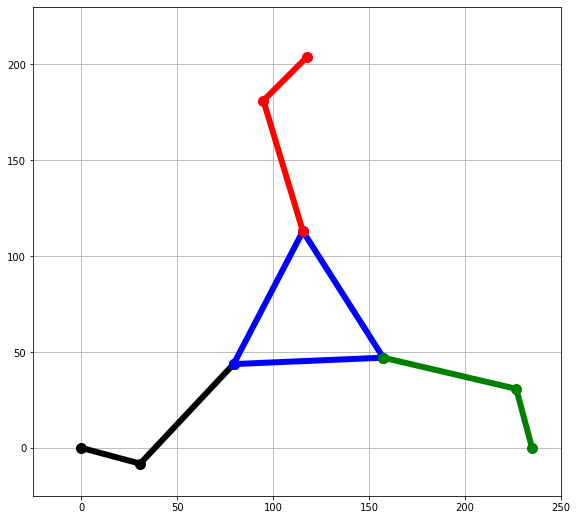

In [10]:
Angles=[]
K1=[]
K2=[]
K3=[]
Ksum=[]
Phi1=[]
Phi2=[]
Phi3=[]
Phisum=[]
X1=[]
Y1=[]
X2=[]
Y2=[]
X3=[]
Y3=[]


for i in range(0,61):

    #Configs initiales du MGD
    AngleInit=-20+i
   
    Angles.append(AngleInit)
    theta10=AngleInit*np.pi/180
    theta20=(AngleInit+120)*np.pi/180
    theta30=(AngleInit+240)*np.pi/180
          
    Config0=MGD(theta10,theta20,theta30)
    
    ########################################################
    ### Pour 1 actionnement
    ########################################################

    theta11=theta10+DeltaX
    theta21=theta20
    theta31=theta30
    
    Config1=MGD(theta11,theta21,theta31)
    
    DeltaAlpha=np.array([min((Config1[3]-Config0[3])%(2*np.pi),(Config0[3]-Config1[3])%(2*np.pi)),min((Config1[4]-Config0[4])%(2*np.pi),(Config0[4]-Config1[4])%(2*np.pi)),min((Config1[5]-Config0[5])%(2*np.pi),(Config0[5]-Config1[5])%(2*np.pi))])
    DeltaTheta=np.array([min((theta11-theta10)%(2*np.pi),(theta10-theta11)%(2*np.pi)),min((theta21-theta20)%(2*np.pi),(theta20-theta21)%(2*np.pi)),min((theta31-theta30)%(2*np.pi),(theta30-theta31)%(2*np.pi))])
    DeltaPhi=np.array([min((Config1[2]-Config0[2])%(2*np.pi),(Config0[2]-Config1[2])%(2*np.pi)),min((Config1[2]-Config0[2])%(2*np.pi),(Config0[2]-Config1[2])%(2*np.pi)),min((Config1[2]-Config0[2])%(2*np.pi),(Config0[2]-Config1[2])%(2*np.pi))])
    DeltaBetaPiezo=np.array([-theta1,-theta2,-theta3])%(2*np.pi) #beta représente l'angle de la pivot au niveau du piezo


    DeltaAngle=abs(np.concatenate([DeltaAlpha,DeltaTheta,DeltaPhi,DeltaBetaPiezo],axis= 0))
    
    phi1=abs(DeltaPhi[1]*180/np.pi)
    Phi1.append(phi1)

    X1.append(abs(Config1[0]-Config0[0]))
    Y1.append(abs(Config1[1]-Config0[1]))
    
    #Rigidité équivalente

    Keq=(1/DeltaX**2)*Kpivot

    SumDeltaAngleCarre=0
    for i in DeltaAngle:
        SumDeltaAngleCarre+=i**2

    Keq1=Keq*SumDeltaAngleCarre
    K1.append(Keq1)

    ########################################################
    ### Pour 2 actionnements
    ########################################################

    #Configs du MGD

    theta11=theta10+DeltaX
    theta21=theta20+DeltaX
    theta31=theta30

    Config1=MGD(theta11,theta21,theta31)

    DeltaAlpha=np.array([min((Config1[3]-Config0[3])%(2*np.pi),(Config0[3]-Config1[3])%(2*np.pi)),min((Config1[4]-Config0[4])%(2*np.pi),(Config0[4]-Config1[4])%(2*np.pi)),min((Config1[5]-Config0[5])%(2*np.pi),(Config0[5]-Config1[5])%(2*np.pi))])
    DeltaTheta=np.array([min((theta11-theta10)%(2*np.pi),(theta10-theta11)%(2*np.pi)),min((theta21-theta20)%(2*np.pi),(theta20-theta21)%(2*np.pi)),min((theta31-theta30)%(2*np.pi),(theta30-theta31)%(2*np.pi))])
    DeltaPhi=np.array([min((Config1[2]-Config0[2])%(2*np.pi),(Config0[2]-Config1[2])%(2*np.pi)),min((Config1[2]-Config0[2])%(2*np.pi),(Config0[2]-Config1[2])%(2*np.pi)),min((Config1[2]-Config0[2])%(2*np.pi),(Config0[2]-Config1[2])%(2*np.pi))])
    DeltaBetaPiezo=np.array([-theta1,-theta2,-theta3])%(2*np.pi) #beta représente l'angle de la pivot au niveau du piezo


    DeltaAngle=abs(np.concatenate([DeltaAlpha,DeltaTheta,DeltaPhi,DeltaBetaPiezo],axis= 0))
    
    phi2=abs(DeltaPhi[1]*180/np.pi)
    Phi2.append(phi2)
    
    X2.append(abs(Config1[0]-Config0[0]))
    Y2.append(abs(Config1[1]-Config0[1]))
    
    #Rigidité équivalente

    Keq=(1/DeltaX**2)*Kpivot

    SumDeltaAngleCarre=0
    for i in DeltaAngle:
        SumDeltaAngleCarre+=i**2

    Keq2=Keq*SumDeltaAngleCarre
    K2.append(Keq2)

    ########################################################
    ### Pour 3 actionnements
    ########################################################

    #Configs du MGD

    theta11=theta10+DeltaX
    theta21=theta20+DeltaX
    theta31=theta30+DeltaX

    Config1=MGD(theta11,theta21,theta31)

    DeltaAlpha=np.array([min((Config1[3]-Config0[3])%(2*np.pi),(Config0[3]-Config1[3])%(2*np.pi)),min((Config1[4]-Config0[4])%(2*np.pi),(Config0[4]-Config1[4])%(2*np.pi)),min((Config1[5]-Config0[5])%(2*np.pi),(Config0[5]-Config1[5])%(2*np.pi))])
    DeltaTheta=np.array([min((theta11-theta10)%(2*np.pi),(theta10-theta11)%(2*np.pi)),min((theta21-theta20)%(2*np.pi),(theta20-theta21)%(2*np.pi)),min((theta31-theta30)%(2*np.pi),(theta30-theta31)%(2*np.pi))])
    DeltaPhi=np.array([min((Config1[2]-Config0[2])%(2*np.pi),(Config0[2]-Config1[2])%(2*np.pi)),min((Config1[2]-Config0[2])%(2*np.pi),(Config0[2]-Config1[2])%(2*np.pi)),min((Config1[2]-Config0[2])%(2*np.pi),(Config0[2]-Config1[2])%(2*np.pi))])
    DeltaBetaPiezo=np.array([-theta1,-theta2,-theta3])%(2*np.pi) #beta représente l'angle de la pivot au niveau du piezo


    DeltaAngle=abs(np.concatenate([DeltaAlpha,DeltaTheta,DeltaPhi,DeltaBetaPiezo],axis= 0))

    phi3=abs(DeltaPhi[1]*180/np.pi)
    Phi3.append(phi3)
    
    X3.append(abs(Config1[0]-Config0[0]))
    Y3.append(abs(Config1[1]-Config0[1]))
    
    #Rigidité équivalente

    Keq=(1/DeltaX**2)*Kpivot

    SumDeltaAngleCarre=0
    for i in DeltaAngle:
        SumDeltaAngleCarre+=i**2

    Keq3=Keq*SumDeltaAngleCarre
    K3.append(Keq3)
    
    Ksum.append(Keq1+Keq2+Keq3)
    Phisum.append(phi1+phi2+phi3)

    
####################################### Singularités

Phi1=np.array(Phi1)
Phi2=np.array(Phi2)
Phi3=np.array(Phi3)

liste_sup=[]

liste_sup_Phi1=np.where(Phi1 > 5)
liste_sup_Phi2=np.where(Phi2 > 5)
liste_sup_Phi3=np.where(Phi3 > 5)

for i in range(np.size(liste_sup_Phi1)):
    liste_sup.append(liste_sup_Phi1[0][i])
    
for i in range(np.size(liste_sup_Phi2)):
    liste_sup.append(liste_sup_Phi2[0][i])
    
for i in range(np.size(liste_sup_Phi3)):
    liste_sup.append(liste_sup_Phi3[0][i])


liste_sup = list(set(liste_sup)) #Enlève les doublons et trie

Phi1=np.delete(Phi1,liste_sup)
Phi2=np.delete(Phi2,liste_sup)
Phi3=np.delete(Phi3,liste_sup)
Phisum=np.delete(Phisum,liste_sup)
Ksum=np.delete(Ksum,liste_sup)
K1=np.delete(K1,liste_sup)
K2=np.delete(K2,liste_sup)
K3=np.delete(K3,liste_sup)
X1=np.delete(X1,liste_sup)
X2=np.delete(X2,liste_sup)
X3=np.delete(X3,liste_sup)
Y1=np.delete(Y1,liste_sup)
Y2=np.delete(Y2,liste_sup)
Y3=np.delete(Y3,liste_sup)
Angles=np.delete(Angles,liste_sup)

######################################## 


NormKsum=Ksum/(max(Ksum))
NormPhisum=Phisum/(max(Phisum))
Norm=NormKsum+(1-NormPhisum)
idx = np.argmin(Norm)

print('Angle qui minimise la raideur :', Angles[idx], '°')
print('K1=', K1[idx]/1000, 'N/um et déplacement de ', Phi1[idx], '°', X1[idx], Y1[idx])
print('K2=', K2[idx]/1000, 'N/um et déplacement de ', Phi2[idx], '°', X2[idx], Y2[idx])
print('K3=', K3[idx]/1000, 'N/um et déplacement de ', Phi3[idx], '°', X3[idx], Y3[idx])




##############################################
############### Affichage ####################
##############################################

# Variables d'entrée

theta1=Angles[idx]*np.pi/180
theta2=(Angles[idx]+120)*np.pi/180
theta3=(Angles[idx]+240)*np.pi/180


X=MGD(theta1,theta2,theta3)
print('')
print('Position de la plateforme pour raideur min :')
print(X)


xm, ym, phi, alpha1, alpha2, alpha3 = X[0], X[1], X[2], X[3], X[4], X[5]
fig, ax = plt.subplots(figsize=(16, 9))
ax.set_xlim([-25, 250])
ax.set_ylim([-25, 230])
ax.grid(True)
ax.set_aspect('equal', 'box')

#ax.lines = []
line, = ax.plot([], [], marker='o', c='k', lw=6, ms=10)
line2, = ax.plot([], [], marker='o', c='b', lw=6, ms=10)
line3, = ax.plot([], [], marker='o', c='g', lw=6, ms=10)
line4, = ax.plot([], [], marker='o', c='r', lw=6, ms=10)


#Paramètres géométriques

#h=2
#b=1
#a=1
#c=4
h=78.0762
b=71.1654
a=31.8449
c=235.0000
#h=78.0762
#b=71.1654
#a=31.8449
#c=235.0000
angle = 2*np.pi/3


#Position prédéfini des jambes 

xq=c
yq = 0

xr=c/2
yr=c*np.sqrt(3)/2

xp = 0
yp = 0


xd = a * np.cos(theta1)
yd = a * np.sin(theta1)

xe = xq + a * np.cos(theta2)
ye = a * np.sin(theta2)

xf = xr + a * np.cos(theta3)
yf = yr + a * np.sin(theta3)

#Equations de résolution

xb1 = 0 + (h * np.sqrt(3) / 3) * np.cos(-np.pi / 6 + phi)
yb1 = 0 + (h * np.sqrt(3) / 3) * np.sin(-np.pi / 6 + phi)

angle = 2*np.pi/3

xc1 = xb1 * np.cos(angle) - yb1 * np.sin(angle)
yc1 = xb1 * np.sin(angle) + yb1 * np.cos(angle)

xa1 = xc1 * np.cos(angle) - yc1 * np.sin(angle)
ya1 = xc1 * np.sin(angle) + yc1 * np.cos(angle)

xb1 += xm
xc1 += xm
xa1 += xm

yb1 += ym
yc1 += ym
ya1 += ym

xc2 = xf + b * np.cos(theta3 + alpha3)
yc2 = yf + b * np.sin(theta3 + alpha3)

xb2 = xe + b * np.cos(theta2 + alpha2)
yb2 = ye + b * np.sin(theta2 + alpha2)

xa2 = xd + b * np.cos(theta1 + alpha1)
ya2 = yd + b * np.sin(theta1 + alpha1)


#Affichage


thisx = [xp, xd, xa2]
thisy = [yp, yd, ya2]
line.set_data(thisx, thisy)

thisx1 = [xa1, xc1, xb1, xa1]
thisy1 = [ya1, yc1, yb1, ya1]
line2.set_data(thisx1, thisy1)

thisx2 = [xq, xe, xb2]
thisy2 = [yq, ye, yb2]
line3.set_data(thisx2, thisy2)

thisx3 = [xr, xf, xc2]
thisy3 = [yr, yf, yc2]
line4.set_data(thisx3, thisy3)
plt.show()

### Modifs pour Creo

Décalage orientation plateforme :

In [11]:
2.19274-Angles[idx]
2.19274-Config0[2]


-3.4579243379468347

In [12]:
print(Phi1)
len(Phi1)

[0.63891679 0.43658164 0.28151063 0.11359191 0.10430628 0.05030456
 0.00946749 0.05378517 0.11234292 0.02915135]


10

### Tests

In [13]:
Phi1=np.array(Phi1)
Phi2=np.array(Phi2)
Phi3=np.array(Phi3)
#Phi1=np.delete(Phi1, np.where(Phi1 > 5)[0], axis=0)
#len(Phi1)
liste_sup=[]

liste_sup_Phi1=np.where(Phi1 > 5)
liste_sup_Phi2=np.where(Phi2 > 5)
liste_sup_Phi3=np.where(Phi3 > 5)

for i in range(np.size(liste_sup_Phi1)):
    liste_sup.append(liste_sup_Phi1[0][i])
    
for i in range(np.size(liste_sup_Phi2)):
    liste_sup.append(liste_sup_Phi2[0][i])
    
for i in range(np.size(liste_sup_Phi3)):
    liste_sup.append(liste_sup_Phi3[0][i])


liste_sup = list(set(liste_sup)) #Enlève les doublons et trie

Phi1=np.delete(Phi1,liste_sup)
Phi2=np.delete(Phi2,liste_sup)
Phi3=np.delete(Phi3,liste_sup)


In [14]:
2225*90*10**(-3)

200.25